# Plot heat stress indices during heatwave periods
- This script is used to plot heat stress indices from simulations;
- Simulations: CNTL, TRAF at UK-Manchester. 

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from pandas import Timedelta
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df = pd.read_csv(f'data_for_figure/heat_stress.csv')
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,HIA_U_cntl,SWBGT_U_cntl,DISCOIS_U_cntl,TSA_U_cntl,RH2M_cntl,TG_U_cntl,HIA_U_traffic,SWBGT_U_traffic,DISCOIS_U_traffic,TSA_U_traffic,RH2M_traffic,TG_U_traffic
0,2022-01-01 00:00:00,13.507699,16.903126,12.787918,286.65768,87.172380,285.81670,13.507699,16.903126,12.787918,286.65768,87.17238,285.86667
1,2022-01-01 01:00:00,13.702210,17.060009,12.961792,286.85220,86.831400,285.81107,13.743844,17.092460,12.997971,286.89383,86.73969,285.88380
2,2022-01-01 02:00:00,13.773051,17.084122,12.996030,286.92307,86.172905,285.52557,13.818438,17.118382,13.034526,286.96844,86.05631,285.58676
3,2022-01-01 03:00:00,13.429821,16.685950,12.580742,286.57983,84.758060,285.15945,13.458423,16.707151,12.604872,286.60843,84.68234,285.21582
4,2022-01-01 04:00:00,13.139027,16.360123,12.236031,286.28903,83.672840,284.88754,13.165053,16.379429,12.258155,286.31506,83.60714,284.94128


In [12]:
col = 2
row = 3
var_list = ['HIA_U', 'SWBGT_U', 'DISCOIS_U'] #'APPAR_TEMP_U'
case_list = ['cntl', 'traffic']
label_list = ['CNTL', 'TRAF']
lc1 = '#d95f02'
lc2 = '#7570b3'
lc = [lc1, lc2]
linewidth = 0.5
labelcolor = '#6b6b6b'
hw1_start_date = pd.to_datetime('2022-07-17 00:00:00') # 3 days
hw1_end_date = pd.to_datetime('2022-07-20 00:00:00')
hw2_start_date = pd.to_datetime('2022-08-09 00:00:00') # 6 days
hw2_end_date = pd.to_datetime('2022-08-15 00:00:00')
hw_start_list = [hw1_start_date, hw2_start_date]
hw_end_list = [hw1_end_date, hw2_end_date]
ax_ymin_list=[10, 16, 12]
ax_ymax_list=[54, 40, 36]
ax2_ymin_list=[-2, -1, -1]
ax2_ymax_list=[6, 1, 1]
labelfont=6
pad = 1
xwidth=0.5
length=2
handletextpad=0.5
title_list = ['NWS_HI', 'sWBGT', 'DI']
padding = 4
alpha=0.25
threshold_list = [[27, 33, 40],
                  [29.4, 31.1, 32.2],
                  [27, 29, 32]]
#red_list = ['#ff9696', '#ff3232', '#ff0000'] #'#ff6464', '#ffbbbb',
red_list = ['#ff875a', '#fb6a4a', '#cb181d']
threshold_label_list = [['Caution', 'Extreme caution', 'Danger'],
                        ['Caution', 'Potentially dangerous', 'Dangerous'],
                        ['Most of population in disconfort', 'Sever stress', 'Emergency']]
yaxis_color = red_list[-1]

In [6]:
df_extreme = df[df['HIA_U_traffic']>=40]
df_extreme_delta = df_extreme['HIA_U_traffic'] - df_extreme['HIA_U_cntl']
df_extreme_delta

4766    0.113333
4767    0.128407
4768    0.146270
4769    0.157101
4785    0.351921
4786    0.183050
4787    0.145463
4788    0.140977
4789    0.134364
4790    0.135803
4791    0.195200
4792    0.102003
dtype: float64

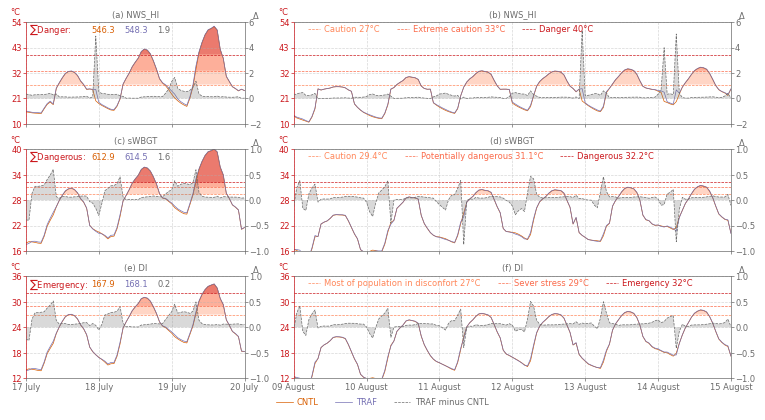

In [13]:
fig = plt.figure(figsize=(7.5, 4))
gs = gridspec.GridSpec(nrows=row, ncols=col, width_ratios=[1, 2])
ax = []
for r in range(row):
    for c in range(col):
        ax.append(fig.add_subplot(gs[r, c]))
for i in range(row*col):
    var_index = i // col
    var = var_list[var_index]
    hw_index =  i % col
    hw_start_date = hw_start_list[hw_index]
    hw_end_date = hw_end_list[hw_index]
    df_hw = df[(df['time'] >= hw_start_date) & (df['time'] <= hw_end_date)]
    ax2 = ax[i].twinx()
    ax_ymax = ax_ymax_list[var_index]
    ax_ymin = ax_ymin_list[var_index]
    ax2_ymax = ax2_ymax_list[var_index]
    ax2_ymin = ax2_ymin_list[var_index]
    delta = df_hw [f'{var}_traffic'] - df_hw [f'{var}_cntl']
    threshold= threshold_list[var_index]
    threshold_label=threshold_label_list[var_index]
    for t in threshold:
        ax[i].axhline(y=t, linestyle='--', linewidth=linewidth, color=red_list[threshold.index(t)], 
                      label = threshold_label[threshold.index(t)] + ' ' + str(t) + '°C')
        ax[i].fill_between(df_hw['time'], df_hw[f'{var}_traffic'], t, where=(df_hw[f'{var}_traffic'] > t), 
                           interpolate=True, color=red_list[threshold.index(t)], edgecolor='none', alpha=0.35)
        #ax[i].text(df_hw['time'].iloc[0]-Timedelta(hours=5), t, f'{t}', color=red_list[threshold.index(t)], fontsize=labelfont, ha='left', va='center')
    for c, case in enumerate(case_list):
        ax[i].plot(df_hw['time'], df_hw[f'{var}_{case}'], label=label_list[c], color = lc[c], linewidth=linewidth)
    ax2.plot(df_hw['time'], delta, label='TRAF minus CNTL', color=labelcolor, linewidth=linewidth, linestyle='--')   
    ax2.fill_between(df_hw['time'], delta, 0, color=labelcolor, alpha=alpha, edgecolor='none')
    ax[i].set_ylim(ax_ymin, ax_ymax)
    ax2.set_ylim(ax2_ymin, ax2_ymax)
    ax[i].set_yticks([ax_ymin, ax_ymin + (ax_ymax - ax_ymin)/4, (ax_ymin + ax_ymax)/2, ax_ymax - (ax_ymax - ax_ymin)/4, ax_ymax])
    ax2.set_yticks([ax2_ymin, ax2_ymin + (ax2_ymax - ax2_ymin)/4, (ax2_ymin + ax2_ymax)/2, ax2_ymax - (ax2_ymax - ax2_ymin)/4, ax2_ymax])
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=yaxis_color, color=yaxis_color,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    if i // col == 2:
         ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    else:
         ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=False, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)   
    for spine in ax[i].spines.values():
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor) 
    ax[i].spines['left'].set_color(yaxis_color)    
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax2.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)    
    for spin in ax2.spines.values():
        spin.set_visible(False)      
    ax[i].set_xlim(df_hw['time'].min(), df_hw['time'].max()) 
    xticks = df_hw['time'].iloc[0::24] 
    ax[i].set_xticks(xticks)   
    #xticks_label = [d.strftime('%m-%d') for d in xticks]
    xticks_label = [d.strftime('%d %B') for d in xticks]
    ax[i].set_xticklabels(xticks_label, fontsize=labelfont, color=labelcolor)
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {title_list[i// col]}',fontsize=labelfont,color=labelcolor, pad = padding)  
    if i%col==0:
        axloc = -0.05
        ax2loc = 1.05
    else:
        axloc = -0.025 
        ax2loc = 1.025    
    ax[i].set_ylabel('°C' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=yaxis_color)   
    ax[i].yaxis.set_label_coords(axloc, 1.05)
    ax2.set_ylabel(r'$\Delta$' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax2.yaxis.set_label_coords(ax2loc, 1.125)
    line, label = ax[i].get_legend_handles_labels()
    if i%col==1:
       threshold_legend = ax[i].legend(line[0:3], label[0:3], loc='upper left', fontsize=labelfont, 
                                       frameon=False, handletextpad=handletextpad, bbox_to_anchor=(0.015, 1.05), handlelength=1.5, ncol=3)
       for t, text in enumerate(threshold_legend.get_texts()):
           text.set_color(red_list[t]) 
    # accumulated heat stress
    else:
        last_threshold = threshold[-1]
        df_extreme = df_hw[df_hw[f'{var}_cntl']>=last_threshold]
        cntl_sum = np.round(df_extreme[f'{var}_cntl'].sum(),1)
        traffic_sum = np.round(df_extreme[f'{var}_traffic'].sum(),1)
        delta = df_extreme[f'{var}_traffic'] - df_extreme[f'{var}_cntl']
        delta_sum = np.round(delta.sum(),1)
        #print(delta_sum)
        ax[i].text(0.015, 0.925, r'$\sum$'+ f'{threshold_label[-1]}: ', transform=ax[i].transAxes, fontsize=labelfont, color=yaxis_color, ha='left', va='center')
        ax[i].text(0.3, 0.925, str(cntl_sum), transform=ax[i].transAxes, fontsize=labelfont, color=lc[0], ha='left', va='center')
        ax[i].text(0.45, 0.925, str(traffic_sum), transform=ax[i].transAxes, fontsize=labelfont, color=lc[1], ha='left', va='center')
        ax[i].text(0.6, 0.925, str(delta_sum), transform=ax[i].transAxes, fontsize=labelfont, color=labelcolor, ha='left', va='center')
plt.subplots_adjust(left=0.025, right=0.965, bottom=0.075, top=0.965, wspace=0.15, hspace= 0.25)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1[-2:] + lines2
labels = labels1[-2:] + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=8)
for i, text in enumerate(legend.get_texts()):
    text.set_color((lc + [labelcolor]*2)[i])    
fig.savefig('heatwave.png', dpi=300)   
fig.savefig('heatwave.pdf', dpi=600)

# Description

In [6]:
df_hw1 = df[(df['time'] >= hw1_start_date) & (df['time'] <= hw1_end_date)]
df_hw2 = df[(df['time'] >= hw2_start_date) & (df['time'] <= hw2_end_date)]
df_hw1.set_index('time', inplace=True)
df_hw2.set_index('time', inplace=True)
df_hw1

,HIA_U_cntl,SWBGT_U_cntl,DISCOIS_U_cntl,TSA_U_cntl,RH2M_cntl,TG_U_cntl,HIA_U_traffic,SWBGT_U_traffic,DISCOIS_U_traffic,TSA_U_traffic,RH2M_traffic,TG_U_traffic
time,,,,,,,,,,,,
2022-07-17 00:00:00,15.221278,17.883995,13.978581,288.37128,78.157130,287.74216,15.564406,17.498154,13.749809,288.71442,68.103065,287.97760
2022-07-17 01:00:00,14.997815,18.215390,14.203309,288.14783,86.124860,287.53513,15.297753,17.818243,13.942830,288.44775,76.176834,287.78760
2022-07-17 02:00:00,14.770914,18.149160,14.102364,287.92093,88.339040,287.40204,15.018472,18.283161,14.264008,288.16846,86.845780,287.68704
2022-07-17 03:00:00,14.636613,18.036308,13.980923,287.78662,88.547610,287.32610,14.927050,18.308882,14.267215,288.07706,88.521350,287.62164
2022-07-17 04:00:00,14.572452,17.867600,13.825230,287.72244,86.885830,286.95880,14.865780,18.139462,14.112979,288.01578,86.844740,287.26310
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-19 20:00:00,26.042470,26.872230,23.008076,298.19907,69.882740,297.32810,26.133999,26.932533,23.068838,298.27510,69.704094,297.61243
2022-07-19 21:00:00,25.216946,26.334210,22.459602,297.50528,71.633640,296.31200,25.327911,26.394058,22.525705,297.59700,71.306350,296.60574
2022-07-19 22:00:00,24.246714,25.658506,21.777426,296.66034,73.639060,295.29450,24.377468,25.713713,21.844332,296.76236,73.164820,295.59262


In [7]:
df_hw1['HIA_U_delta'] = (df_hw1['HIA_U_traffic'] - df_hw1['HIA_U_cntl'])
max_delta_index = df_hw1['HIA_U_delta'].idxmax()
print(max_delta_index, df_hw1['HIA_U_delta'].max()) 

2022-07-17 23:00:00 4.906554999999997


/tmp/ipykernel_4079815/1027238336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw1['HIA_U_delta'] = (df_hw1['HIA_U_traffic'] - df_hw1['HIA_U_cntl'])


In [8]:
df_hw2['HIA_U_delta'] = (df_hw2['HIA_U_traffic'] - df_hw2['HIA_U_cntl'])
max_delta_index = df_hw2['HIA_U_delta'].idxmax()
print(max_delta_index, df_hw2['HIA_U_delta'].max()) 

2022-08-12 23:00:00 5.344691999999998


/tmp/ipykernel_4079815/912827692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw2['HIA_U_delta'] = (df_hw2['HIA_U_traffic'] - df_hw2['HIA_U_cntl'])
